### Loading libraries & importing data 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import BASE_COLORS

In [2]:
data = pd.read_csv("data_mid_bootcamp_project_classification/creditcardmarketing.csv")

# Cleaning data


In [3]:
data.head()

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [4]:
data.columns

Index(['1', 'No', 'Air Miles', 'Letter', 'High', '1.1', 'No.1', 'High.1', '2',
       '1.2', '4', 'No.2', '1160.75', '1669', '877', '1095', '1002'],
      dtype='object')

In [5]:
#first row is data not headers, adding it to the data 
data.loc[len(data)] = ['1', 'No', 'Air Miles', 'Letter', 'High', '1', 'No', 'High', '2',
       '1', '4', 'No', '1160.75', '1669', '877', '1095', '1002']

In [6]:
#18000 rows as expected 
data.shape

(18000, 17)

In [7]:
#changing missing column headers 

data.columns = ['1', 'offer_accept', 'reward', 'mailer_type', 'income_level', 'no_accounts', 'overdraft_protect', 'credit_rating', 'no_cards',
       'no_homes', 'household_size', 'home_owner', 'avg_balance', 'avg_balance_q1', 'avg_balance_q2', 'avg_balance_q3', 'avg_balance_q4']

In [8]:
#dropping first column as it is index 
data = data.drop(columns= ["1"])

In [9]:
data.head()

,offer_accept,reward,mailer_type,income_level,no_accounts,overdraft_protect,credit_rating,no_cards,no_homes,household_size,home_owner,avg_balance,avg_balance_q1,avg_balance_q2,avg_balance_q3,avg_balance_q4
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39,106,78,366
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.5,367,352,145,242
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578,1760,1119,419
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140,1357,982,365
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847,1365,750,497


In [10]:
data.describe()

,offer_accept,reward,mailer_type,income_level,no_accounts,overdraft_protect,credit_rating,no_cards,no_homes,household_size,home_owner,avg_balance,avg_balance_q1,avg_balance_q2,avg_balance_q3,avg_balance_q4
count,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,17976.0,17976.0,17976.0,17976.0,17976.0
unique,2,3,2,3,4,2,3,5,4,9,2,4729.0,2159.0,1946.0,2282.0,2185.0
top,No,Air Miles,Postcard,Medium,1,No,High,2,1,3,Yes,1127.0,81.0,1060.0,809.0,497.0
freq,16977,6061,9147,9013,13691,15322,6071,7943,14522,5712,11655,17.0,23.0,30.0,30.0,26.0


Many categorical variables, very few numerical ones, the numerical ones seems to be very similar

In [11]:
data.dtypes

offer_accept         object
reward               object
mailer_type          object
income_level         object
no_accounts          object
overdraft_protect    object
credit_rating        object
no_cards             object
no_homes             object
household_size       object
home_owner           object
avg_balance          object
avg_balance_q1       object
avg_balance_q2       object
avg_balance_q3       object
avg_balance_q4       object
dtype: object

In [12]:
#changing data types 
cols = ['no_accounts', 'no_cards', 'no_homes', 'household_size', 'avg_balance', 'avg_balance_q1', 'avg_balance_q2', 'avg_balance_q3', 'avg_balance_q4']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
data.dtypes

offer_accept          object
reward                object
mailer_type           object
income_level          object
no_accounts            int64
overdraft_protect     object
credit_rating         object
no_cards               int64
no_homes               int64
household_size         int64
home_owner            object
avg_balance          float64
avg_balance_q1       float64
avg_balance_q2       float64
avg_balance_q3       float64
avg_balance_q4       float64
dtype: object

In [14]:
#checking for nulls
data.isnull().sum()

offer_accept          0
reward                0
mailer_type           0
income_level          0
no_accounts           0
overdraft_protect     0
credit_rating         0
no_cards              0
no_homes              0
household_size        0
home_owner            0
avg_balance          24
avg_balance_q1       24
avg_balance_q2       24
avg_balance_q3       24
avg_balance_q4       24
dtype: int64

In [15]:
#Based on that the lowest value in avg balance is 48.25 and not 0, very few rows, decide to drop
data.min()

offer_accept                No
reward               Air Miles
mailer_type             Letter
income_level              High
no_accounts                  1
overdraft_protect           No
credit_rating             High
no_cards                     1
no_homes                     1
household_size               1
home_owner                  No
avg_balance              48.25
avg_balance_q1               0
avg_balance_q2               0
avg_balance_q3               0
avg_balance_q4               0
dtype: object

In [16]:
#drop NaNs
data = data.dropna(axis=0)

In [17]:
#down to 17975 rows 
data.shape

(17976, 16)

In [18]:
#splitting upp numerical and categorical for further exploration
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object) 

# Exploring numerical data

In [19]:
numerical.describe()

,no_accounts,no_cards,no_homes,household_size,avg_balance,avg_balance_q1,avg_balance_q2,avg_balance_q3,avg_balance_q4
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


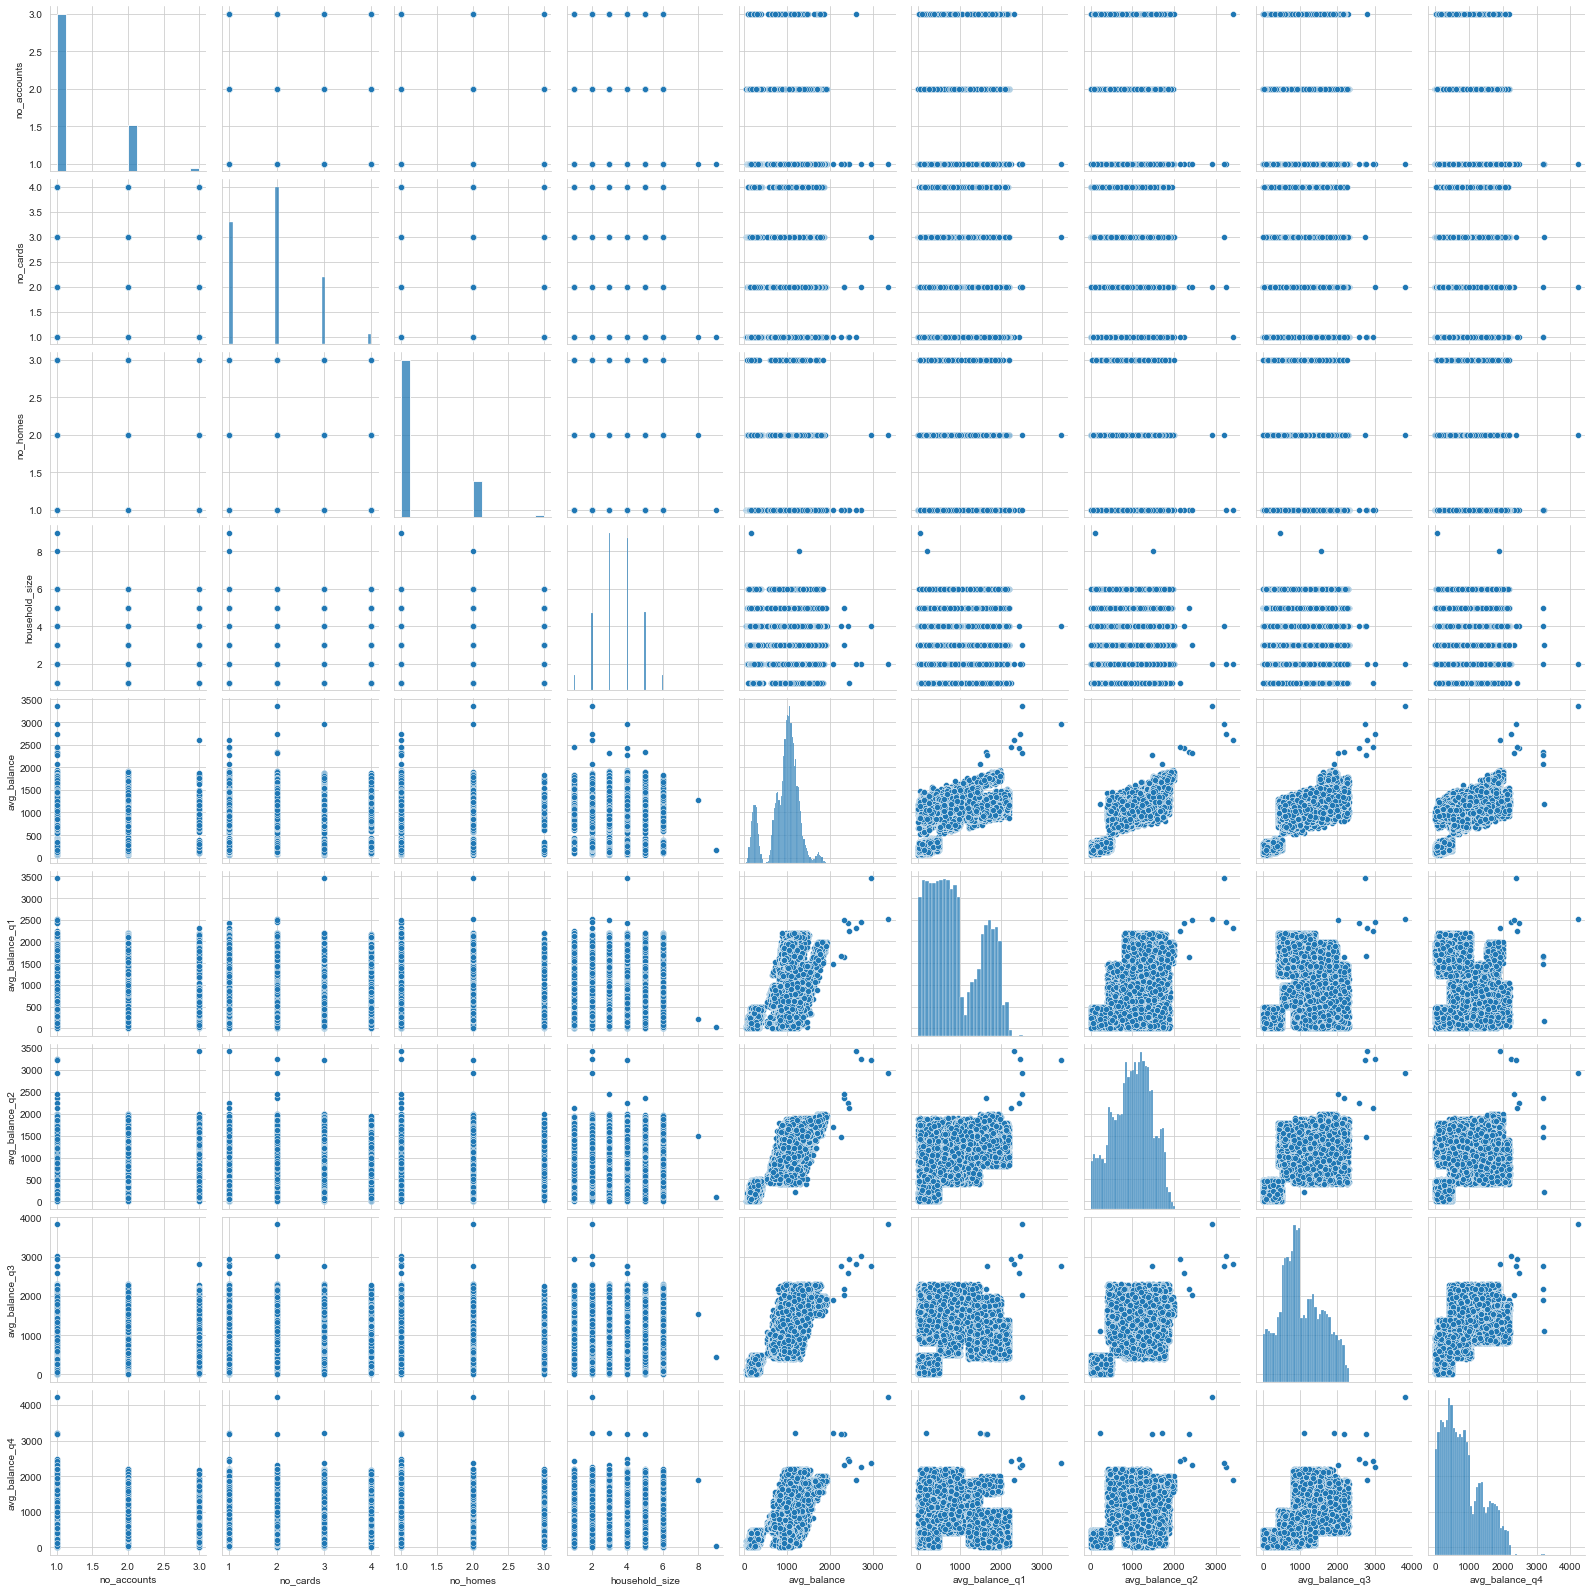

In [20]:
sns.pairplot(numerical)

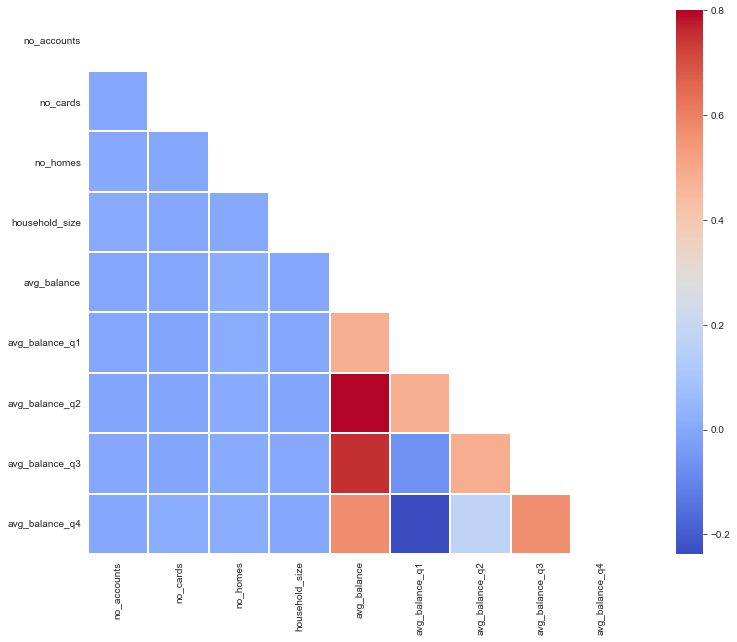

In [21]:
#checking for multicoliniarity
mask = np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(numerical.corr(), mask=mask,
square=True, linewidths=1, cmap="coolwarm",)

As expected, avg_balance is highly correlated with the average balances for quarters. Dropping these columns as they are redundant.

In [22]:
numerical = numerical.drop(columns= ["avg_balance_q1", "avg_balance_q2", "avg_balance_q3", "avg_balance_q4" ])

In [23]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(10,5)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.histplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

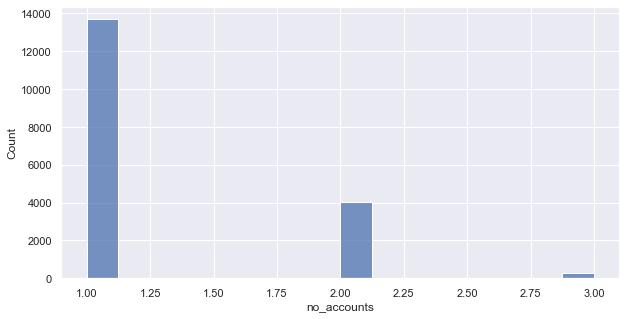

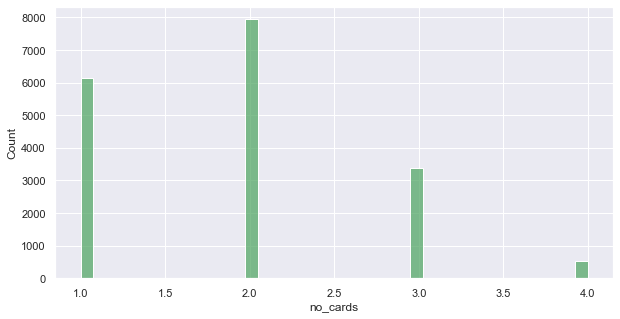

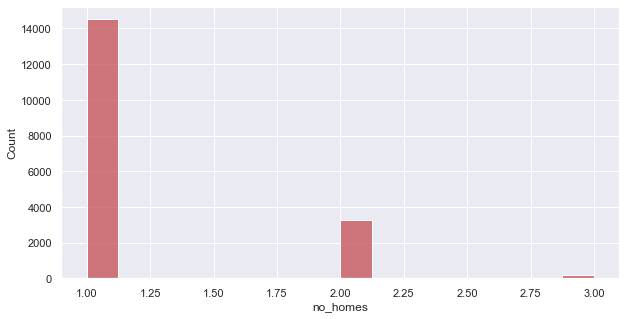

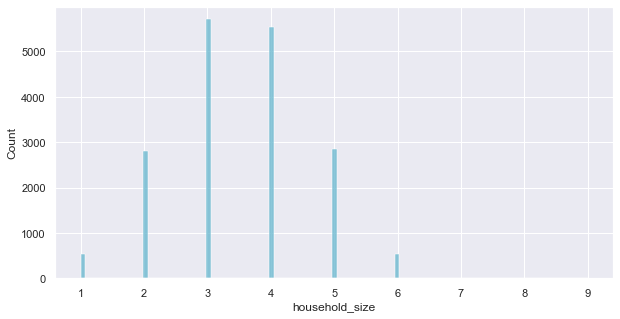

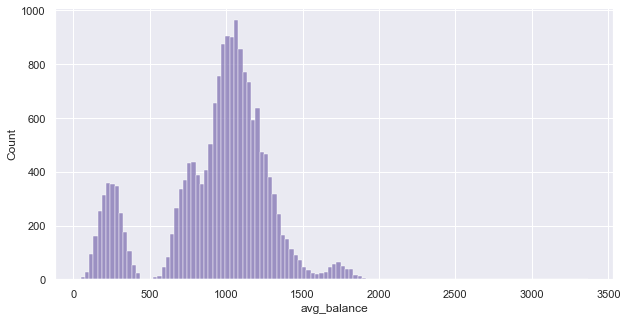

In [24]:
df_hist(numerical)

Few outliers, avg_balance and avg_balance_q2 are not normally distributed, will handle belov

<AxesSubplot:xlabel='avg_balance'>

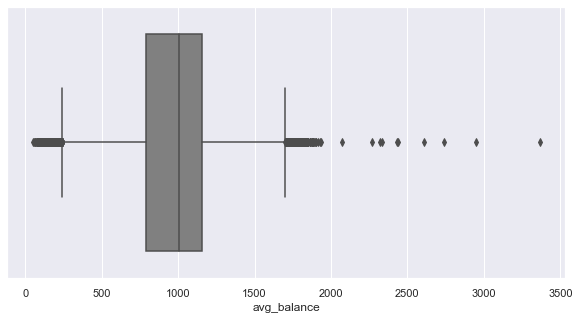

In [25]:
sns.boxplot(x=numerical["avg_balance"], color = "gray")

A few larger outliers, these do not seem to be faulty data but rather customers with very high balances

### Normalizing data

Binning the avg_balance, seems like there are 3 types of customers. TThose who have a balance under 500, those with a medium average balance, and those with a significantly higher one

In [26]:
def binning(df):
    if df > 1500:
        return "high_balance"
    elif df > 500:
        return "medium_balance"
    else: 
        return "low_balance"
   

In [27]:
numerical["avg_balance"] = numerical["avg_balance"].apply(binning)

<AxesSubplot:ylabel='avg_balance'>

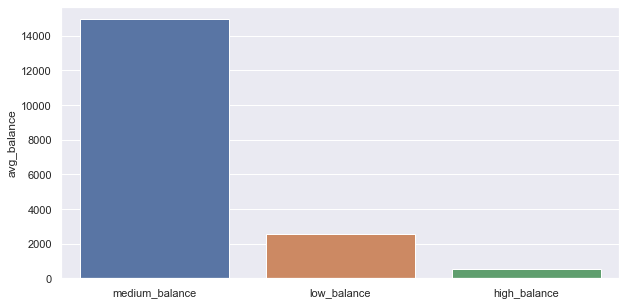

In [28]:
sns.barplot(x = numerical["avg_balance"].value_counts().index, y = numerical["avg_balance"].value_counts())

In [29]:
#adding column to categorical dataframe
categorical["avg_balance"]= numerical["avg_balance"]
numerical = numerical.drop(columns= ["avg_balance"])

# Exploring categorical data

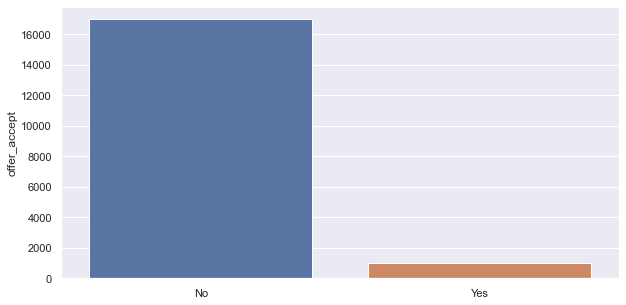

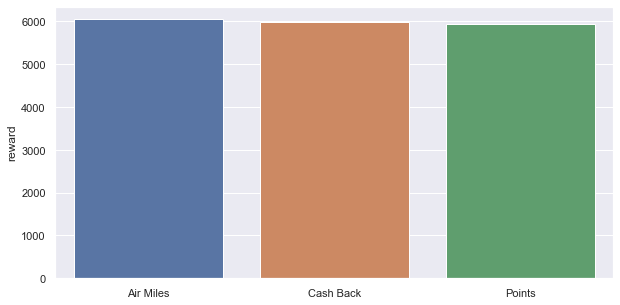

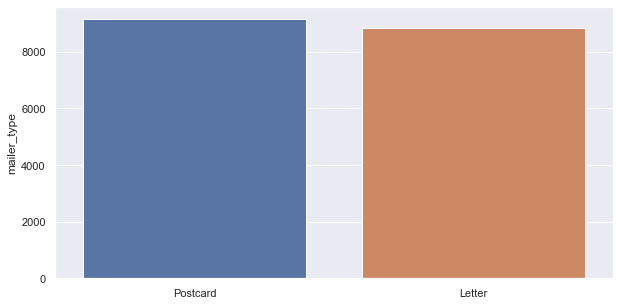

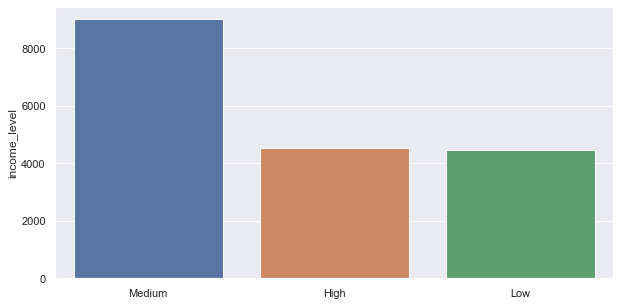

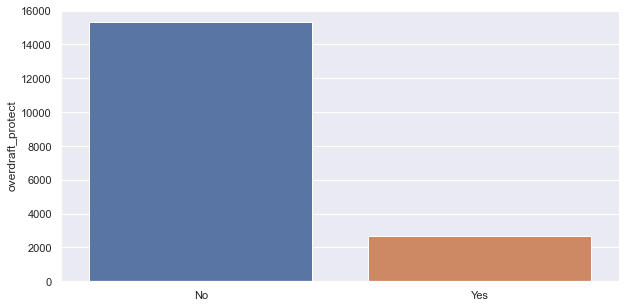

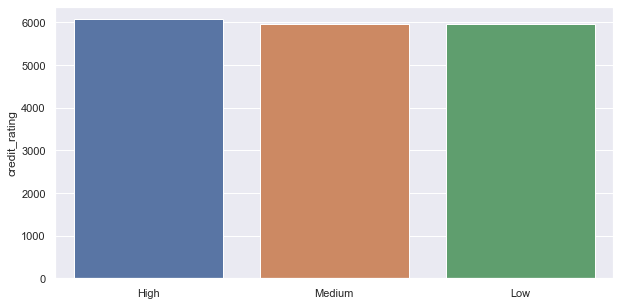

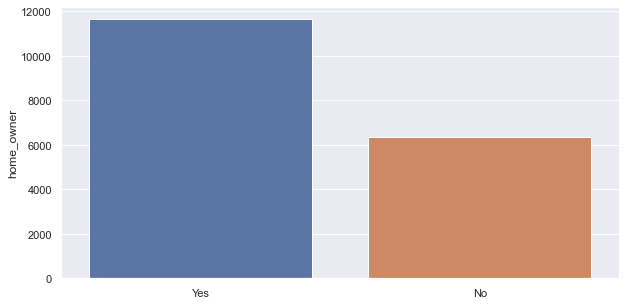

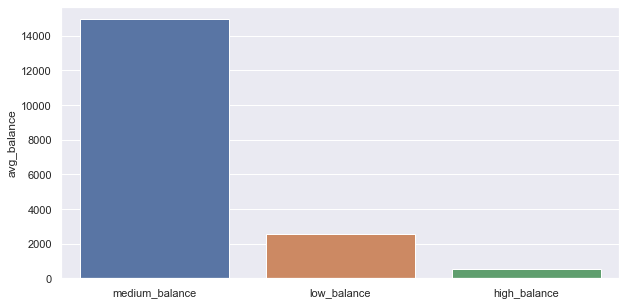

In [30]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(10,5)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

df_bar(categorical)

Can see that our target variable offer_accept has very few "yes". Dataset is imbalanced. This will be taken into consideration when choosing models and under/over-sampling techniques will be used.

In [31]:
data["offer_accept"].value_counts()

No     16955
Yes     1021
Name: offer_accept, dtype: int64

In [32]:
1021 / (16955+1021)

0.05679795282599021

# Checking for correlation with target variable

### Correlation with categorical variables

In [33]:
one_hot = categorical

In [34]:
one_hot.dtypes

offer_accept         object
reward               object
mailer_type          object
income_level         object
overdraft_protect    object
credit_rating        object
home_owner           object
avg_balance          object
dtype: object

In [35]:
one_hot = pd.get_dummies(one_hot, columns = one_hot.columns)

##### Using dummies to be able to plot correlation for categorical variables

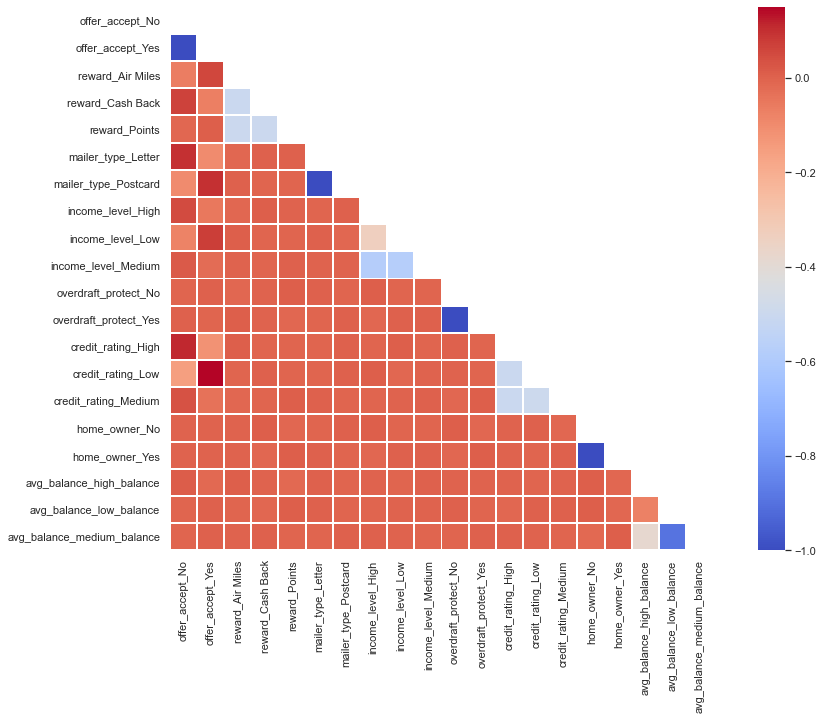

In [36]:
mask = np.zeros_like(one_hot.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(one_hot.corr(), mask=mask,
square=True, linewidths=1, cmap="coolwarm",)

Correlation found between target variable and mailer type, income level, reward and credit rating 

### Correlation with numerical variables

##### Encoding target variable and adding it to our dataframe containing numerical values

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["offer_accept"] = label_encoder.fit_transform(data["offer_accept"])

In [38]:
data.dtypes

offer_accept           int64
reward                object
mailer_type           object
income_level          object
no_accounts            int64
overdraft_protect     object
credit_rating         object
no_cards               int64
no_homes               int64
household_size         int64
home_owner            object
avg_balance          float64
avg_balance_q1       float64
avg_balance_q2       float64
avg_balance_q3       float64
avg_balance_q4       float64
dtype: object

In [99]:
numerical2 = data.select_dtypes(np.number)

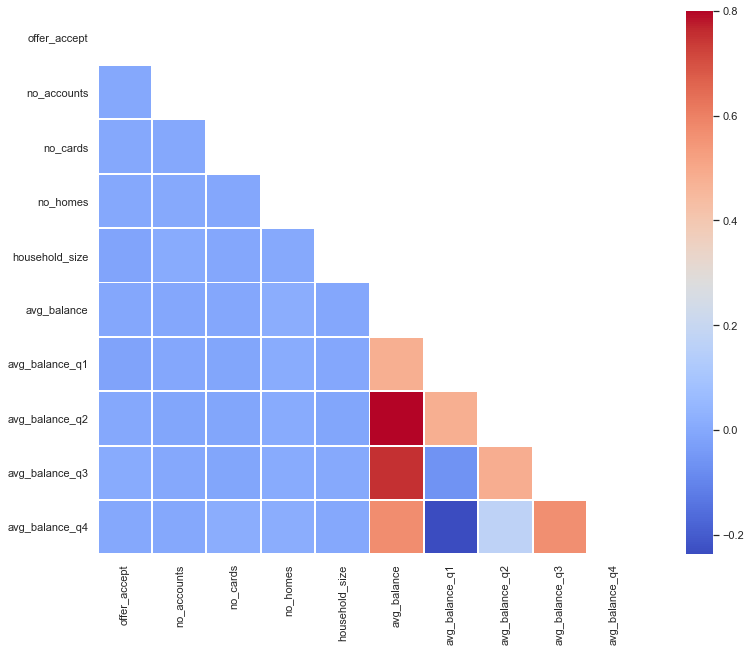

In [100]:
mask = np.zeros_like(numerical2.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(numerical2.corr(), mask=mask,
square=True, linewidths=1, cmap="coolwarm",)

No correlation between numerical values and target variable offer accept. Will thus not coninclude any of these variables to the model. Some multicoliniarity still between numerical columns but will not do anything about it since they're not included in the model.

# Dropping columns

In [41]:
categorical.columns

Index(['offer_accept', 'reward', 'mailer_type', 'income_level',
       'overdraft_protect', 'credit_rating', 'home_owner', 'avg_balance'],
      dtype='object')

In [42]:
numerical.columns

Index(['no_accounts', 'no_cards', 'no_homes', 'household_size'], dtype='object')

Only keeping columns that have some correlation with target variable. Keeping credit rating, mailer type, income level, reward. Also dropping target variable.

In [43]:
categorical = categorical.drop(columns= ['offer_accept','overdraft_protect', 'home_owner', 'avg_balance'])

# One Hot Encoding data 

In [44]:
one_hot = categorical

In [45]:
one_hot.dtypes

reward           object
mailer_type      object
income_level     object
credit_rating    object
dtype: object

In [46]:
one_hot = pd.get_dummies(one_hot, columns = one_hot.columns)

In [47]:
one_hot.head()

,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
0,1,0,0,1,0,0,0,1,0,0,1
1,1,0,0,0,1,1,0,0,0,0,1
2,1,0,0,1,0,0,0,1,1,0,0
3,1,0,0,1,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,1,1,0,0


Making target variable binary

In [48]:
label_encoder = LabelEncoder()
data["offer_accept"] = label_encoder.fit_transform(data["offer_accept"])

# Logistic regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics

Train test split

In [50]:
X = one_hot
y = data["offer_accept"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.25, 
                                                    random_state=101)

Training and Predicting

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4240
           1       0.00      0.00      0.00       254

    accuracy                           0.94      4494
   macro avg       0.47      0.50      0.49      4494
weighted avg       0.89      0.94      0.92      4494



<AxesSubplot:>

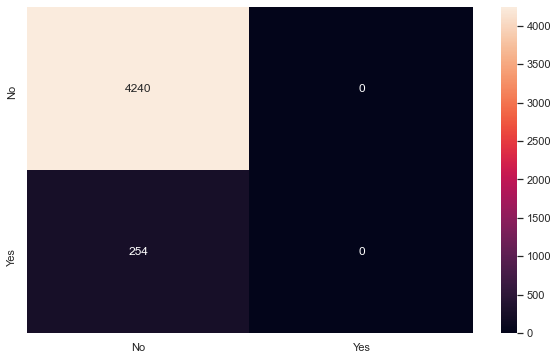

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)
index = ['No', 'Yes']  
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True, fmt='g')

Top left and low righ are true negatives / true positives, top right and low left are false positives and false negatives

In [54]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [55]:
accuracy(cm)

0.9434801958166444

Accuracy 0.94, not great since if we only guess "no" we would have accuracy of 94 %

In [56]:
r2_score(y_test, predictions)

-0.05990566037735845

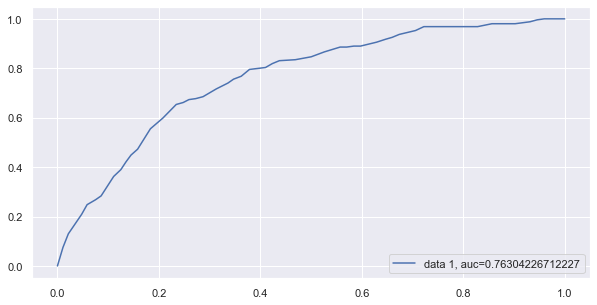

In [57]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Under Sampler - Logistic regression

In [58]:
data["offer_accept"].value_counts()

0    16955
1     1021
Name: offer_accept, dtype: int64

In [59]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Creating a random under sample

In [60]:
rus = RandomUnderSampler()
X = one_hot
y = data["offer_accept"]
X_rus, y_rus = rus.fit_sample(X, y)

In [61]:
y_rus.value_counts()

1    1021
0    1021
Name: offer_accept, dtype: int64

Train test split + training the model

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, 
                                                    y_rus, test_size=0.25, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       261
           1       0.66      0.73      0.69       250

    accuracy                           0.68       511
   macro avg       0.69      0.69      0.68       511
weighted avg       0.69      0.68      0.68       511



<AxesSubplot:>

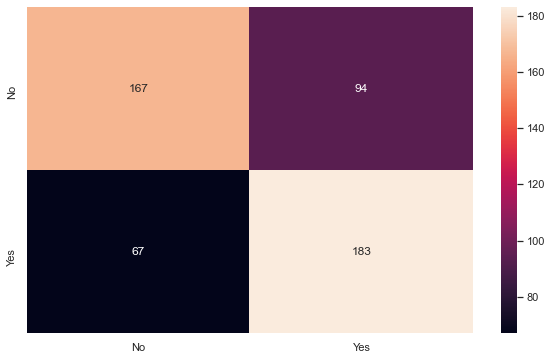

In [64]:
cm = confusion_matrix(y_test,predictions)
index = ['No', 'Yes']  
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True, fmt='g')

Top left and low righ are true negatives / true positives, top right and low left are false positives and false negatives

In [65]:
accuracy(cm)

0.684931506849315

In [66]:
r2_score(y_test, predictions)

-0.2608582375478927

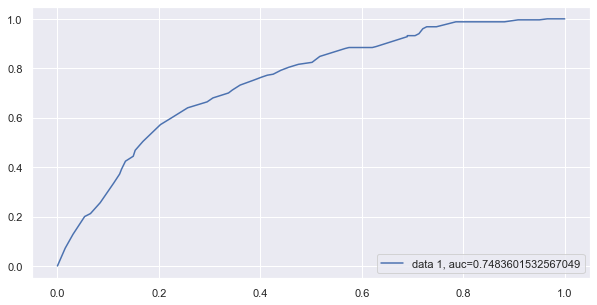

In [67]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Over Sampler - Logistic regression

Creating a random over sample

In [68]:
ros = RandomOverSampler()
X = one_hot
y = data["offer_accept"]
X_ros, y_ros = ros.fit_sample(X, y)

In [69]:
y_ros.value_counts()

1    16955
0    16955
Name: offer_accept, dtype: int64

Train test split + training the model

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, 
                                                    y_ros, test_size=0.25, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      4201
           1       0.69      0.71      0.70      4277

    accuracy                           0.69      8478
   macro avg       0.69      0.69      0.69      8478
weighted avg       0.69      0.69      0.69      8478



<AxesSubplot:>

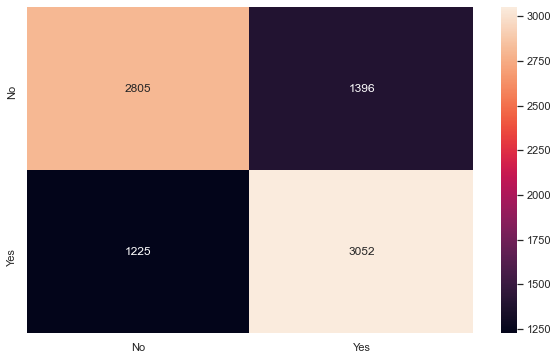

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)
index = ['No', 'Yes']  
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True, fmt='g')

Top left and low righ are true negatives / true positives, top right and low left are false positives and false negatives

In [73]:
accuracy(cm)

0.6908468978532672

In [74]:
r2_score(y_test, predictions)

-0.23671179084530491

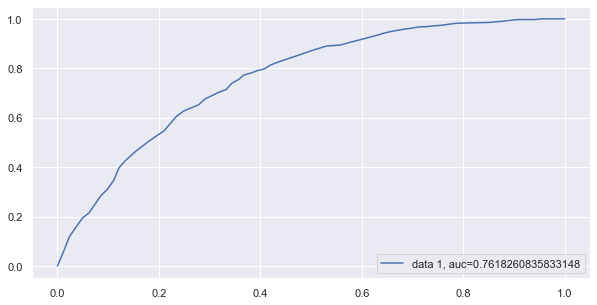

In [75]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE - Logistic Regression

In [76]:
from imblearn.over_sampling import SMOTE

Creating an oversample using SMOTE. SMOTE not only increases the size of the training set, it also increses the variaty. Something that Random Over Sampling does not.

In [77]:
smote = SMOTE()
X = one_hot
y = data["offer_accept"]
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    16955
0    16955
Name: offer_accept, dtype: int64

Train test split + training the model

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, 
                                                    y_sm, test_size=0.25, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      4201
           1       0.69      0.73      0.71      4277

    accuracy                           0.70      8478
   macro avg       0.70      0.70      0.70      8478
weighted avg       0.70      0.70      0.70      8478



In [80]:
evaluateSMOTE = classification_report(y_test,predictions)

<AxesSubplot:>

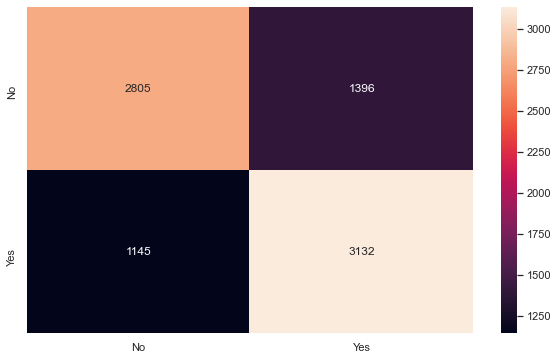

In [81]:
cm = confusion_matrix(y_test,predictions)
index = ['No', 'Yes']  
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True, fmt='g')

Top left and low righ are true negatives / true positives, top right and low left are false positives and false negatives

In [82]:
accuracy(cm)

0.7002830856334041

In [83]:
r2_score(y_test, predictions)

-0.19896400630977484

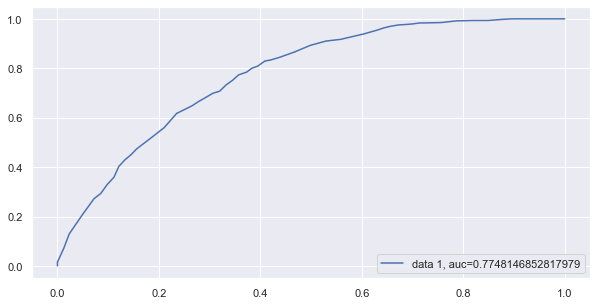

In [84]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE - K-NN Model 

Using X-y split from SMOTE and applying the K-NN model

In [85]:
from sklearn.neighbors import KNeighborsClassifier

#### Finding the best K value from a pre defined set of values 

In [86]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,30): # The values of K. = 2-30
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [87]:
bestK = scores.index(max(scores))+3
print("K-value with highest R2 score is:", bestK)

K-value with highest R2 score is: 27


Text(0, 0.5, 'R2')

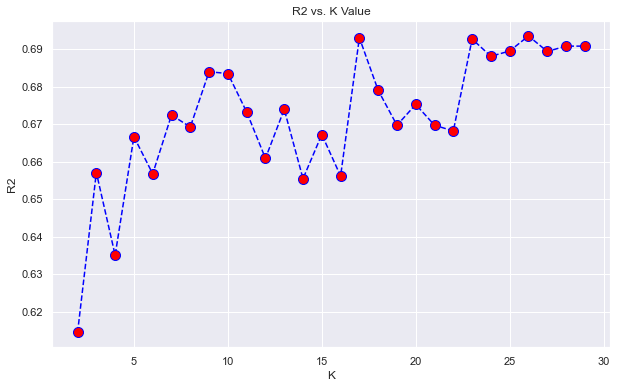

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(2,30),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#### Best K-value is used below

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=bestK)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [90]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      4201
           1       0.67      0.75      0.71      4277

    accuracy                           0.69      8478
   macro avg       0.69      0.69      0.69      8478
weighted avg       0.69      0.69      0.69      8478



In [91]:
evaluateKNN = classification_report(y_test,knn_predictions)

<AxesSubplot:>

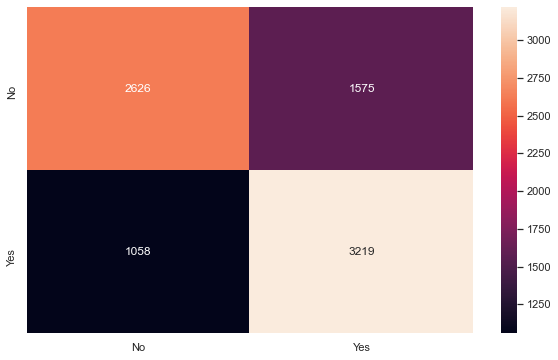

In [92]:
cm = confusion_matrix(y_test,knn_predictions)
index = ['No', 'Yes']  
columns = ['No', 'Yes']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6)) 
sns.heatmap(cm_df, annot=True, fmt='g')

In [93]:
accuracy(cm)

0.6894314696862468

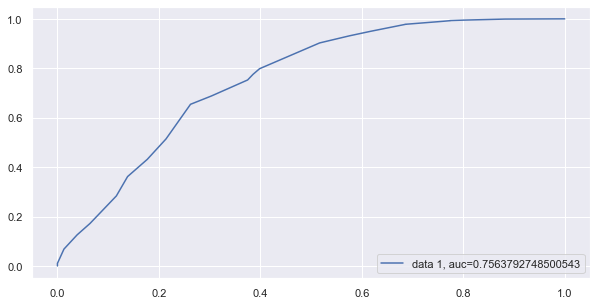

In [94]:
y_pred_proba = knn_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Evaluating models

Accuracy - Ratio of correctly predicted observation to the total observations as seen in confusion matrix

Precision - Ratio of correctly predicted positive observations to the total predicted positive observations.

Recall (Sensitivity) - Ratio of correctly predicted positive observations to the all observations in "Yes".

F1 score - The weighted average of Precision and Recall. This score takes both false positives and false negatives into account, making it a better model when the class distribution is uneven.

 ##### Some thoughts about the dataset

We have an imbalanced dataset with 94 % of customers declining the offer. Based on the dataset, we can not draw conclusions as to whether it is better to have false positives or false negatives, that is, we do not know if the bank would rather market this credit card deal to too many people, or if they would rather save costs on marketing and miss out on some opportunities. 

##### Handling the imbalance

SMOTE, Random Undersampling and Random Oversampling gives an F1 between 68- and 71 % for predicting both the accepts and declines. However I think that in this dataset SMOTE is the most appropriate for this datased once since it allows us to keep all data while adding some variation to the new samples. 

In [95]:
print(evaluateSMOTE)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      4201
           1       0.69      0.73      0.71      4277

    accuracy                           0.70      8478
   macro avg       0.70      0.70      0.70      8478
weighted avg       0.70      0.70      0.70      8478



The SMOTE model has about a 70 % chance of predicting both the clients who would accept and the clients who would decline. Since so few people accet, this model would be used to predict the clients we should target in marketing to accept the credit card. If the sample is representative to the population, then using this model to predict who would decline does not make sense since 94 % of customers in dataset currently decline.

#### After choosing best method to handle the imbalance in the dataset, k_NN is applied to this balanced dataset. 

In [96]:
print(evaluateKNN)

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      4201
           1       0.67      0.75      0.71      4277

    accuracy                           0.69      8478
   macro avg       0.69      0.69      0.69      8478
weighted avg       0.69      0.69      0.69      8478



With this dataset, the k-NN- and Logistic Regression model give similar results. 

##### Conclusion

My conclusion would be that for this dataset the k-NN and Logistic Regression - classifiers are equally good, maybe logistic would better because it is easier to use and runs faster. With more time, I would try both RandomForest and DesicionTree - classifiers.